# Get Calibration coefficent of the  spectra of CTIO Data in January 2017
==================================================================================================

- author : Sylvie Dagoret-Campagne
- affiliation : LAL/IN2P3/CNRS FRANCE
- date   : January 29th 2017
- update : January 26th 2017

Read old calibration

In [32]:
%%javascript
var kernel = IPython.notebook.kernel;
var thename = window.document.getElementById("notebook_name").innerHTML;
var command = "theNotebook = " + "'"+thename+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [33]:
print theNotebook

GetCalibration_HD14943


In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from astropy.modeling import models
from astropy import units as u
from astropy import nddata
from astropy.io import fits
import re
import os

In [35]:
import ccdproc
print 'ccdproc version',ccdproc.__version__

from astropy.modeling import models

ccdproc version 1.0.1


In [36]:
from scipy import stats  
from scipy import ndimage
from datetime import datetime, timedelta
from mpl_toolkits.mplot3d import Axes3D
import scipy.signal

In [37]:
import bottleneck as bn  # numpy's masked median is slow...really slow (in version 1.8.1 and lower)
print 'bottleneck version',bn.__version__

bottleneck version 1.0.0


In [38]:
import photutils
from astropy.stats import sigma_clipped_stats
from photutils import daofind
from photutils import CircularAperture
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
#from photutils.background import Background2D
from photutils import Background2D, SigmaClip, MedianBackground

In [39]:
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [40]:
from IPython.display import Image, display

In [41]:
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

In [42]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (4, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [43]:
############################################################################
def ensure_dir(f):
    d = os.path.dirname(f)
    if not os.path.exists(f):
        os.makedirs(f)
#########################################################################

In [44]:
FIT_ORDER=2

### Output directory for images generated in the notebook view (not true fits images)

In [45]:
dir_top_images="images_notebooks/"+theNotebook ### Top directory to save images

In [46]:
ensure_dir(dir_top_images) # create that directory

### Object

In [47]:
object_name='HD14943'
date_name='2017_01_17'

### Calibration Results

- SpecCalibFitResults_HD14943_2017_01_17.fits


In [48]:
simspectracalibresult='SpecCalibFitResults_'+object_name+'_'+date_name +'.fits'

## Load the Fits results for the calibration

In [49]:
hdu_list=fits.open(simspectracalibresult)
hdu_list.info()

Filename: SpecCalibFitResults_HD14943_2017_01_17.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       7   ()      
  1              ImageHDU         7   (3, 104)   float64   
  2              ImageHDU         7   (3, 104)   float64   


In [50]:
print hdu_list[0].header

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                    8 / array data type                                NAXIS   =                    0 / number of array dimensions                     EXTEND  =                    T                                                  ANALYST = 'Sylvie Dagoret-Campagne'                                             OBJ-NAME= 'HD14943 '                                                            COMMENT Fits straight line on spectra                                           END                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [51]:
fitparam_rightspectra=hdu_list[1].data
fitparam_leftspectra=hdu_list[2].data

In [52]:
def GetCalib(fitparam):
    SIZE=len(fitparam)
    for index in np.arange(SIZE):
        if index == 0:
            fitparam_mean=fitparam[index]
        else:
            fitparam_mean+=fitparam[index]
    fitparam_mean/=float(SIZE)
    return fitparam_mean

In [53]:
GetCalib(fitparam_rightspectra)

array([ -3.08122762e-04,   1.32237608e+00,  -4.76682373e+01])

In [58]:
GetCalib(fitparam_leftspectra)

array([ -3.54351721e-04,   1.38256367e+00,  -6.47410527e+01])

In [54]:
SIZE_RIGHT=len(fitparam_rightspectra)
SIZE_LEFT=len(fitparam_leftspectra)

In [55]:
X=np.arange(0,1000)

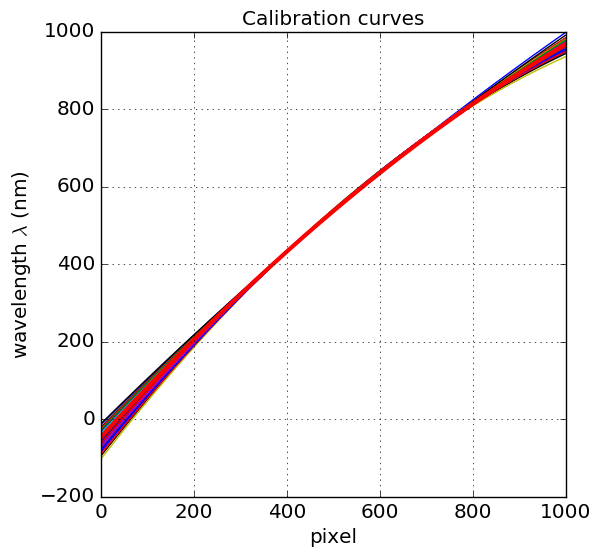

In [56]:
plt.figure(figsize=(6,6))
for index in np.arange(SIZE_RIGHT):
    if index == 0:
        fitparam=fitparam_rightspectra[index]
    else:
        fitparam+=fitparam_rightspectra[index]
        
    fitcurve1 = np.poly1d(fitparam_rightspectra[index])
    fitcurve2 = np.poly1d(fitparam_leftspectra[index])
    Y1=fitcurve1(X)
    Y2=fitcurve2(X)
    plt.plot(X,Y1,'-')
    plt.plot(X,Y2,'-')
fitparam/=float(SIZE_RIGHT)
fitcurve=np.poly1d(fitparam)
Y=fitcurve(X)
plt.plot(X,Y,'r-',lw=3)
plt.grid(True)
plt.title('Calibration curves')
plt.xlabel('pixel')
plt.ylabel('wavelength $\lambda$ (nm)')

In [57]:
print fitparam

[ -3.07861934e-04   1.32202266e+00  -4.75695134e+01]
